In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/Models/Handwritten Character Recognition/Handwritten_Character_Recognition.h5")

In [2]:
class_names = [chr(i + ord("A")) for i in range(26)]

def plot_image(predictions_array, img):
    img = img.reshape((28, 28))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    plt.xlabel("predicted : {}".format(class_names[predicted_label], color='blue'))

def plot_value_array(predictions_array):
    plt.grid(False)
    plt.xticks(range(26), class_names)
    plt.yticks([])
    thisplot = plt.bar(range(26), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('blue')

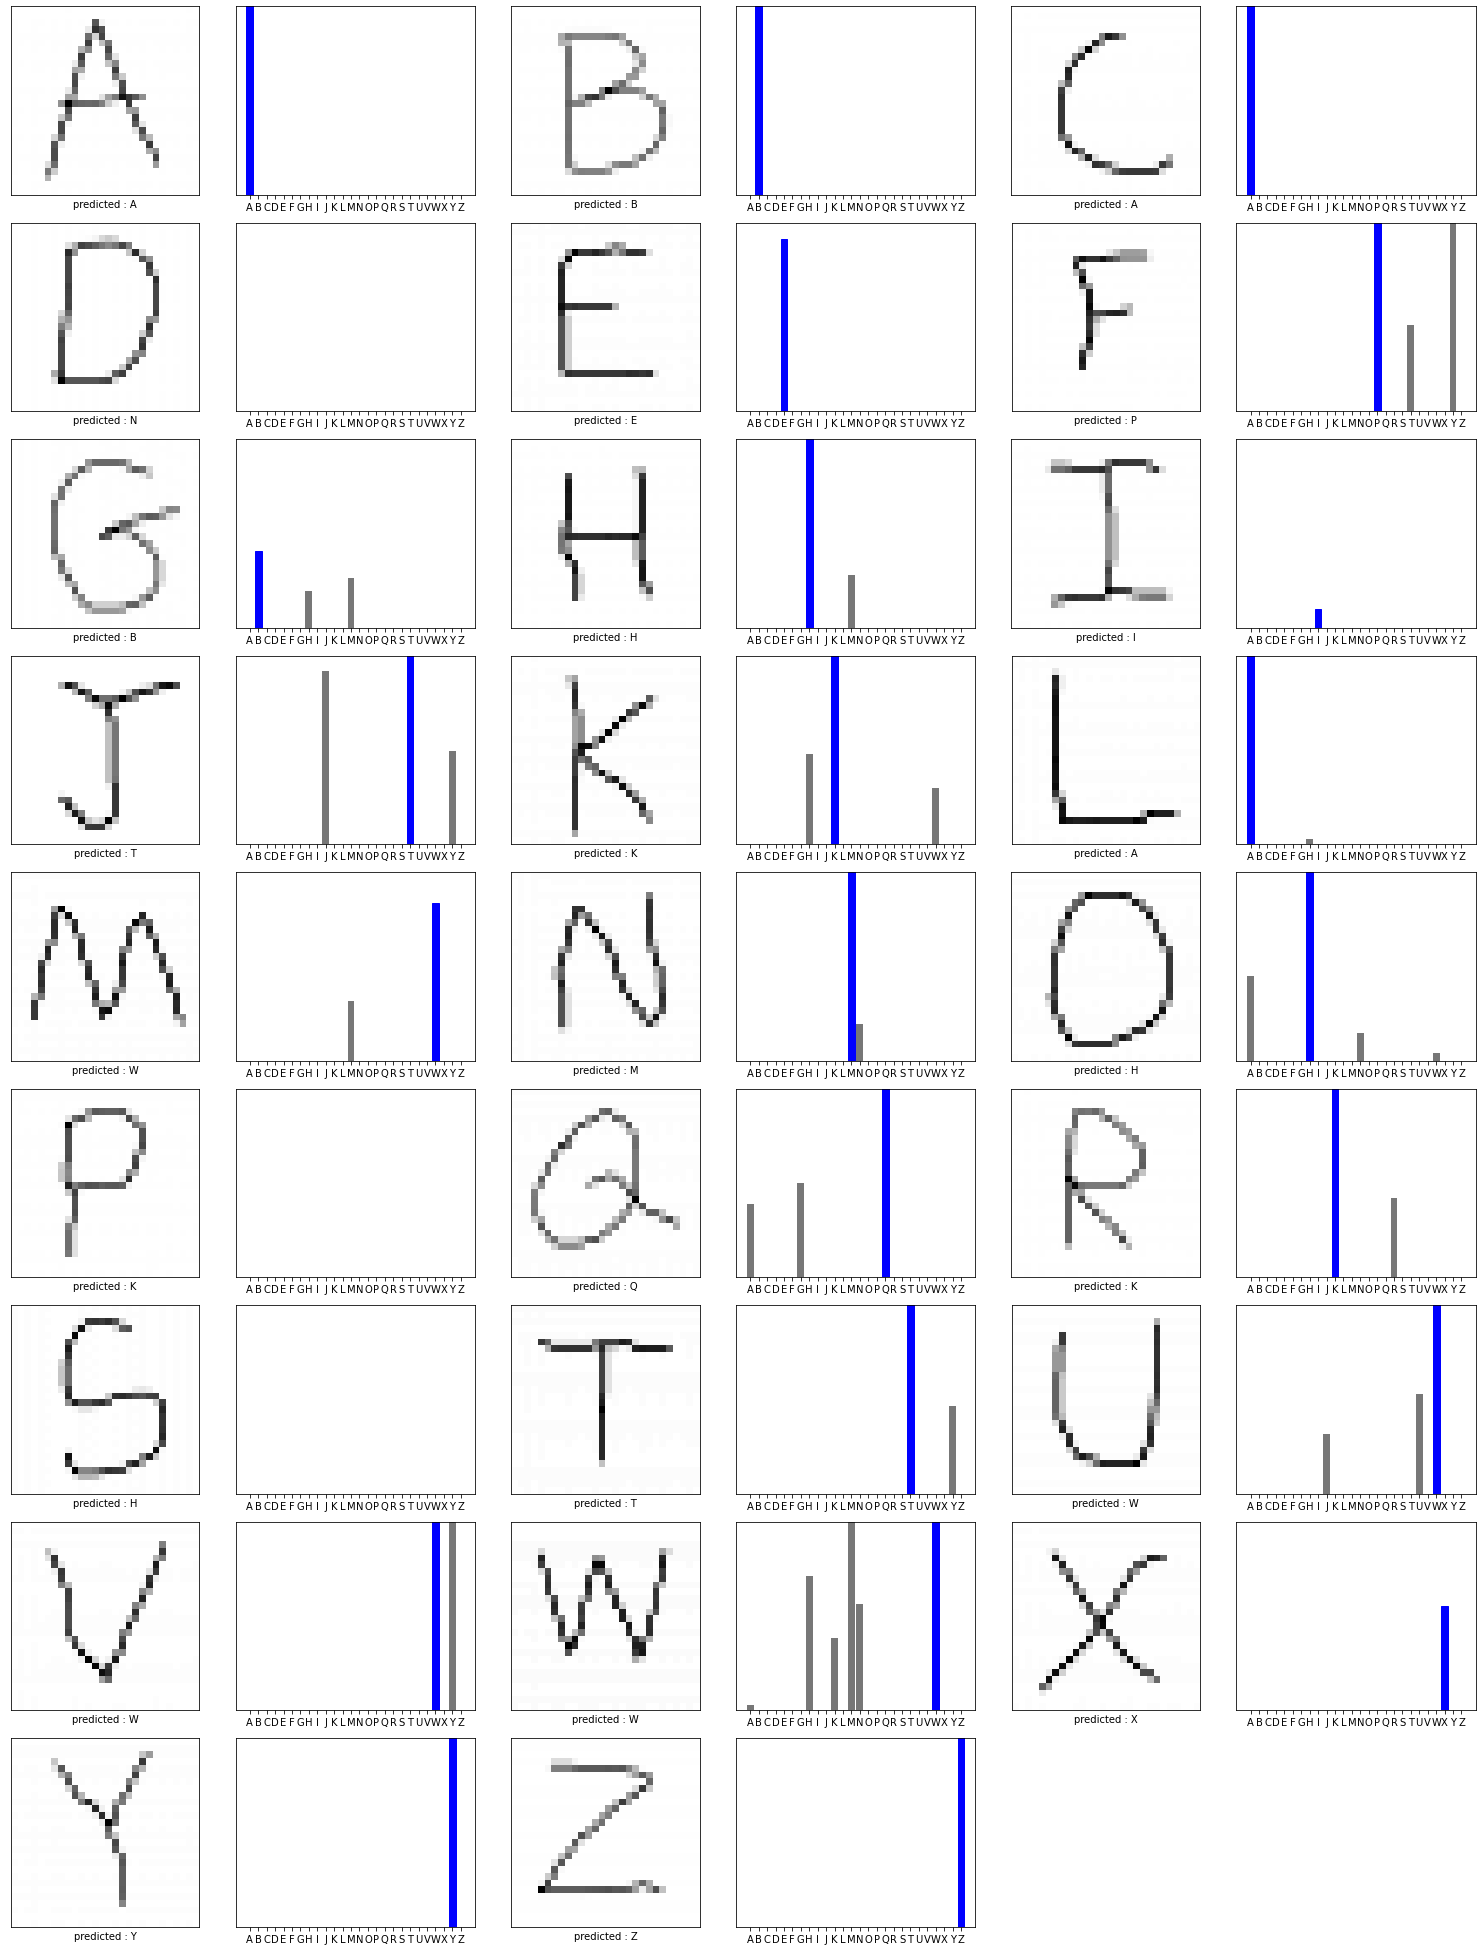

In [4]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 13
num_cols = 3
plt.figure(figsize=(7*num_cols, 3*num_rows))
for i in range(26):
    img_path = "/content/drive/MyDrive/Colab Notebooks/Models/Handwritten Character Recognition/letters/" + chr(i + ord("A")) + ".png"
    x = cv2.imread(img_path)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    x = 255.0 - x
    x = x / 255.0
    p = model.predict(np.array([x]))
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(p, x)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    p = p.flatten()
    plot_value_array(p)
plt.tight_layout()
plt.show()